# Hands-On: Deep Neural Networks with Keras and Tensorflow


## Motivation/Zielsetzung
* Schnelleinstieg in Deep Learning mit Open Source Tools
* Einführung in Architektur von NN - Parameterauswahl
* Ziel: Einfachen Klassifikator für eigene Daten


## Überblick
* Tools 
* Workflow (Keras)
* Convolutional Neural Network 
    * Transfer Learning
* Demo: Klemmen Klassifikator (einfach gehalten)
* Anwendungsgebiete (Wago?) 

***

# Tools: Python, Jupyter, Tensorflow, Keras

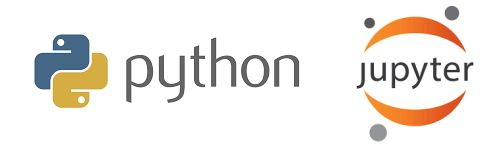

## Python
* stark verbreitet: 
    * Vielfalt an Libs (Std, 3rd: OpenCv, Matplotlib, ...) 
* Anwendungsgebiet Data Science:
    * dynamisch (Interpreter)
    * Prototyping
    * Fokus auf Daten/Algorithmen

## Jupyter
* web-basiert/markdown/Browser
* Cells: Ausführbarer Code und Doku gemischt

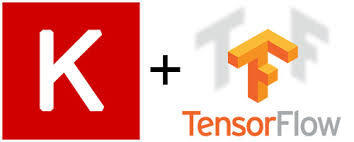

## Tensorflow

* Google’s OpenSource DL framework 
    * Google Translate, Google Photos
* C++/Python Api
* Raspberry Pi, Android, (PFC?)
* http://playground.tensorflow.org
* Tensorboard: Visualisierung

## Keras

* high-level Deep Learning Framework
* häufig angewendet bei Kaggle.com Wettbewerben
* ursprünglich entwickelt für Froscher
* Verschiedene Backends: (für Tensor Operationen)
    * Theano, Tensorflow, CNTK, (MxNet)
    * Bestandteil von TensorFlow ab 1.4
* Schnellstart
    * viele Parameter voreingestellt
    * einfach Layer zusammenstellen
* GitHub: https://github.com/fchollet/keras

***

# Tensor

* Kontainer für numerische Daten
    * NumPy Lib liegt fast allen Deep Learning Frameworks zugrunde
* "__Tensorflow__":
    * __tensors flow through data flow graphs and are altered by operations__
    * Layer: tensor operations
    
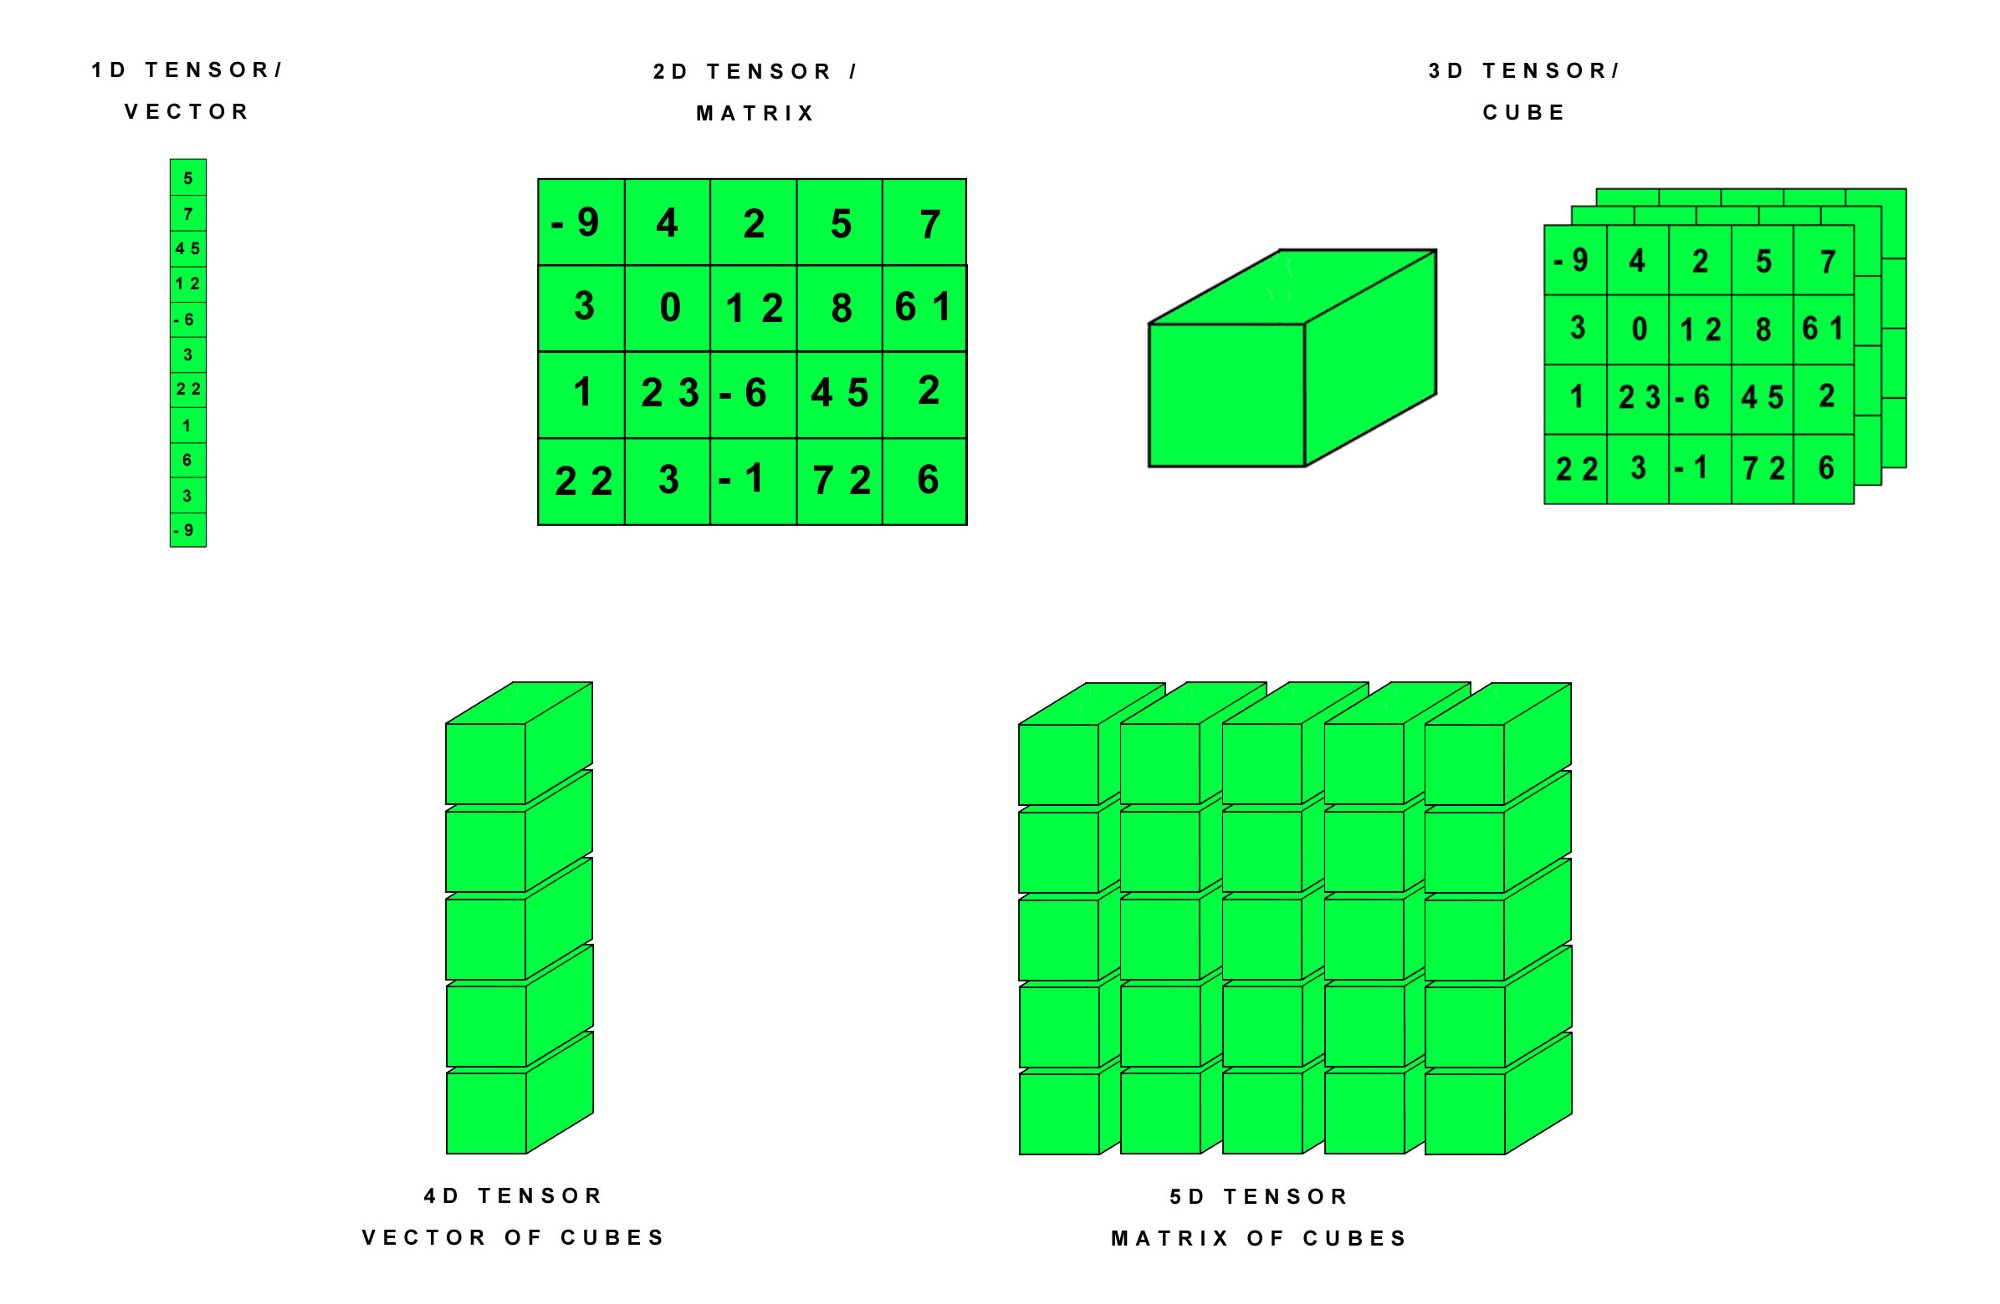

* Beispiele:
    * 4D Images: (sample_size, width, heigth, channel)
    * 5D Video : (sample_size, frames, width, height, color_depth)

***

In [38]:
import numpy

# 2d Tensor (matrix)
x = numpy.array([[1,2],[3,4],[5,6]])
print('shape: ', x.shape ,' dim: ', x.ndim)

# 3d Tensor
x = numpy.array([ 
                 [[1,2],[3,4],[5,6]] ,
                 [[1,2],[3,4],[5,6]] 
                ])
print('shape: ', x.shape ,' dim: ', x.ndim)

shape:  (3, 2)  dim:  2
shape:  (2, 3, 2)  dim:  3


# Überblick Lernprozess
 
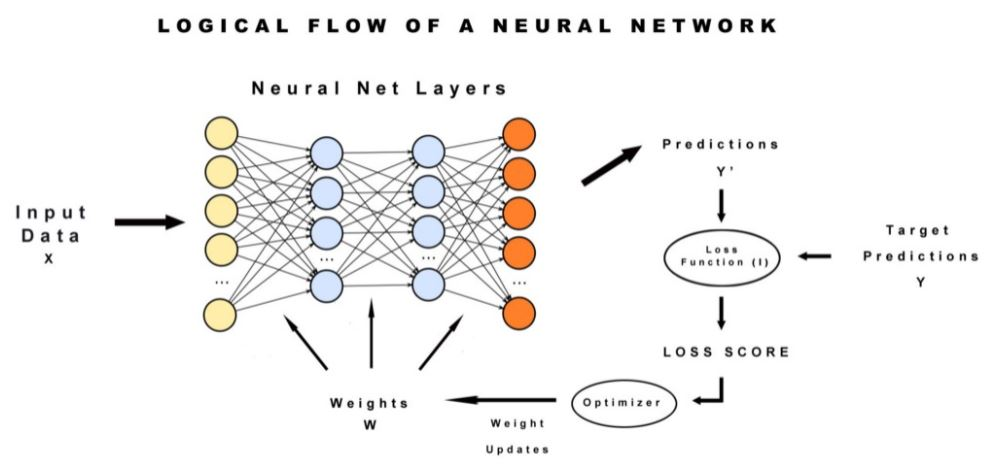


# Keras Workflow 
* Umsetzung des Lernprozesses durch Keras

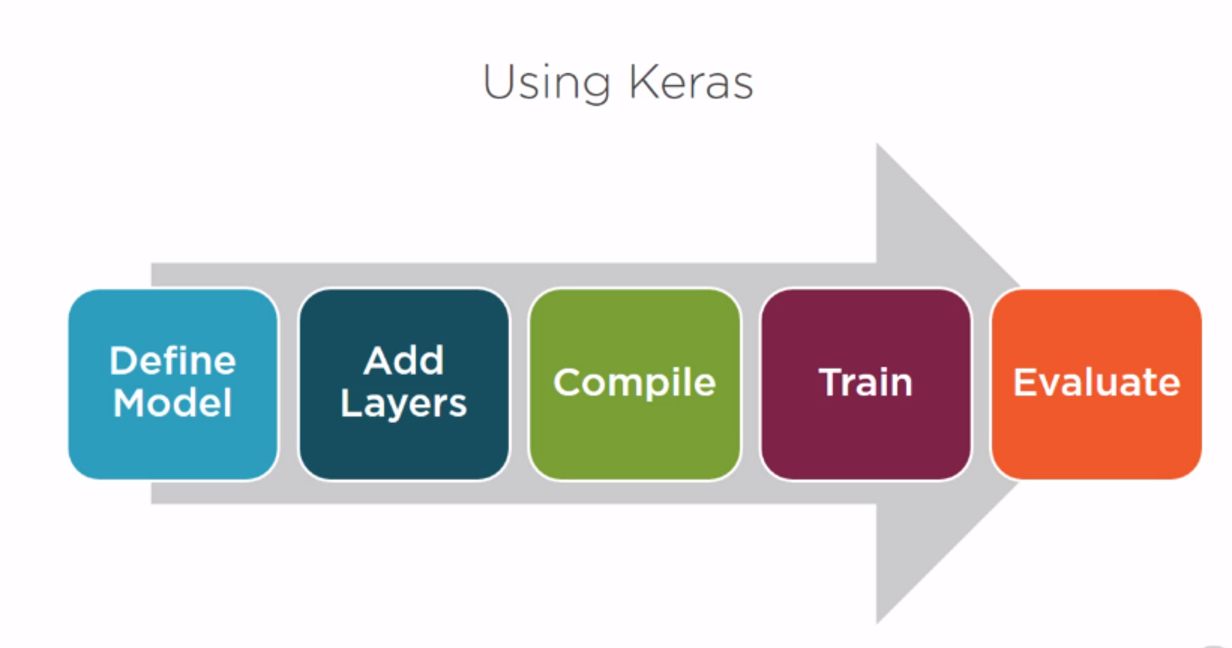

In [ ]:
import numpy as np
from keras.models import Sequential

# Datensatz laden + vorbereiten
X_train, Y_labels = np.load('training_set_with_labels.npy')

# 1. Define ModelModel Design: 
model = Sequential()
# 2. Add Layers
model.add(...)
[...] # Model Architektur

# 3. Compile: Graph aufbauen
model.compile()

# 4. Train: Model auf Datensatz trainieren
model.fit(X_train, Y_labels)

# 5. Model evaluieren auf anderen Daten mit Label: loss, accuracy 
model.evaluate(...)

# Model Vorhersage auf neuen Daten ohne Label
model.predict(...)

### Daten vorbereiten

* Definiere Input/Output Tensors (zb sensordaten)
* Daten ggf. kodieren in Tensor
* Normieren (verbessert die Performance)
* Keras: einige Datensätze mitgeliefert 
    * image classification:MNIST database of handwritten digits
    * sentiment classification: IMDB Movie reviews 
    * regression: Boston housing price 
    
### Definiere ein Model (Netz von Layern) 

* Functional API (für multi input/output layer), 
* Sequential: Stack von Schichten 
    * Weiterleitung der Ausgabe direkt in den Input der nächsten Layer

In [ ]:
from keras.models import Sequential

model = Sequential() 
model.add(Dense(16,input_shape=(8,), activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

# zB 8 Kategorien (Body mass index, Age, Schwangerschaften, ...)
# 1 Ausgabe ( Diabetes ja/nein)

# Layers

* Dense
* Dropout
* Flatten
* Conv2d
* MaxPooling2D
* ...

### Aktivierungsfunktionen:
* bisher: zwei lineare Operationen - Skalarprodukt und Addition 
* <font color ='blue'> Linear </font>(default, output durchreichen, liner regression)</font>
* <font color ='blue'>ReLu</font>
    * vanishing gradient, einfache Ableitung
* <font color ='blue'>Softmax</font>
    * Wahrscheinlichkeitsverteilung der Klassen (summiert sich zu 1) 
* <font color ='blue'>Sigmoid</font>
    * Output wird auf 0 bis 1 normiert
    
***

# Compile
* s. Übersicht
* Tensorflow Graph wird aufgebaut (operators and tensors)

### loss:

* Die Größe die minimiert werden soll während des Trainings
* Maß für den Erfolg des Models die Aufgabe zu lösen
    
### optimizer:

* Art die Gewichte/Parameter zu aktualisieren
* RMSprop, SGD, ...

### metrics:
* Monitoring welche Größen ausgegeben werden sollen

***

# Fit 
* Iteration über die Trainingsdaten
* Batch : Menge an Trainingsdaten auswerten bevor das Netz (Gewichte) aktualisiert werden soll

# Evaluate 
* Auswertung auf ungesehene Daten/ Generalisierungsfähigkeit

***

# Ergebnis bewerten? Wann ist ein Netz gut? 


## Tensorboard

* gesamten trainierten Graphen anzeigen
* Metriken anzeigen
* <font color ='blue'>tensorboard --logdir=logs_vgg</font>

***

# Overfitting

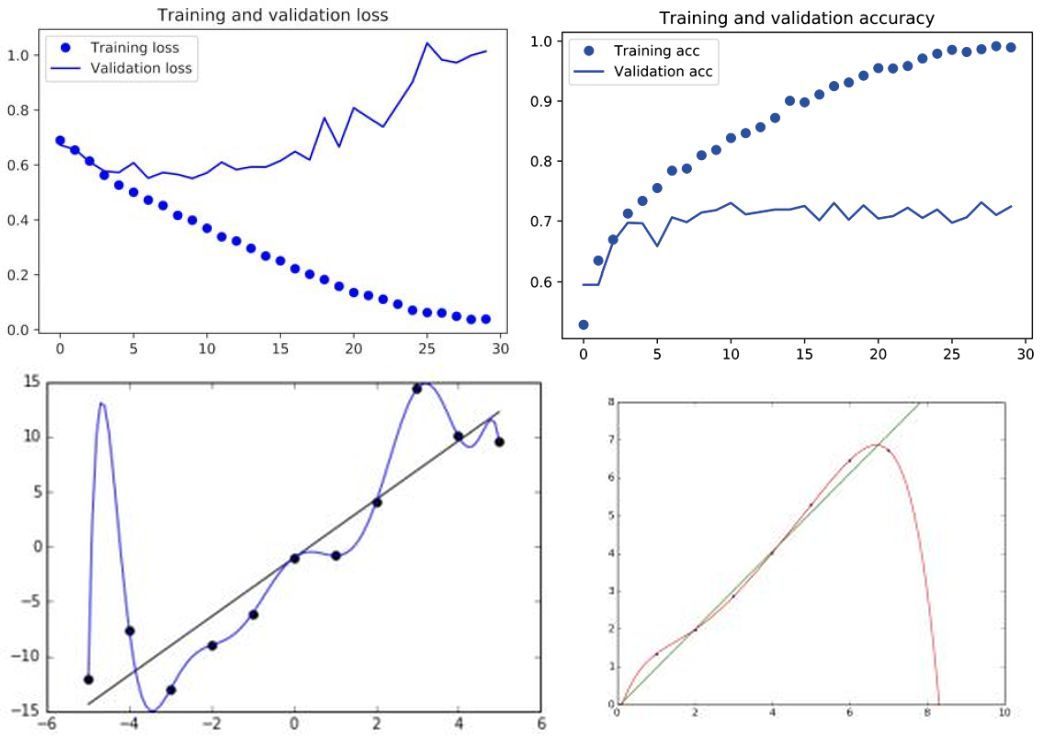

## Strategien gegen Overfitting

* Mehr Daten! zB Image augmentation
* andere Netz Architektur (zuviele Freiheitsgrade (Neuronen))
* Regularization: Gewichte klein halten
* Dropout

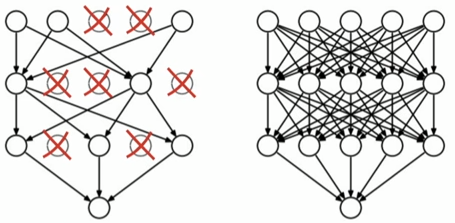


# Erfahrungswerte Parameterwahl

* Hinweis: Universelle Funktionsapproximation erreichbar mit einem MLP
    * Dictionary-like mapping bei zuvielen Freiheitsgraden
    
* Vorgehen beim Aufbauen einer Netzarchitektur:
    * Model erstellen das overfittet
    * Hyperparameter tuning
        * Anzahl Neuronen, Anzahl Layer, Epochen, Learning rate decay, Momentum
 
* Performance des Netzes immer mit bisher ungesehenen Daten bewerten
 

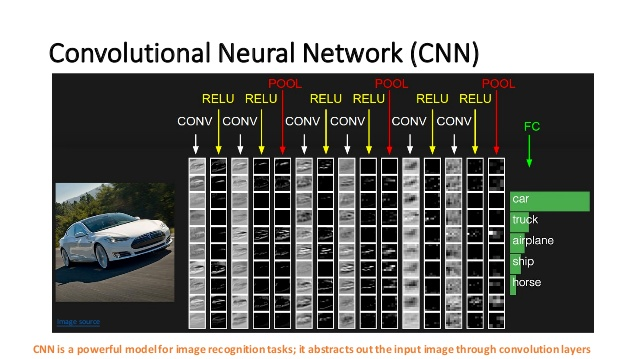

### hierarchisches Vision System
* Start mit Kanten and Ecken
* Shapes: Formen/Umrisse
* komplexe Strukturen
* Gesichter

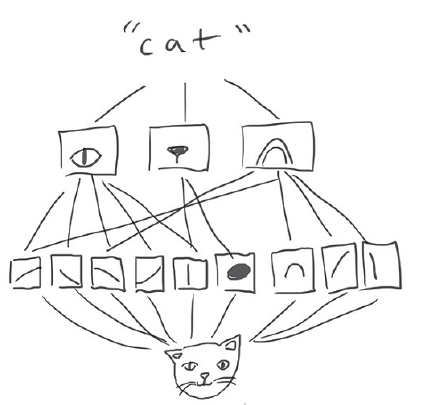

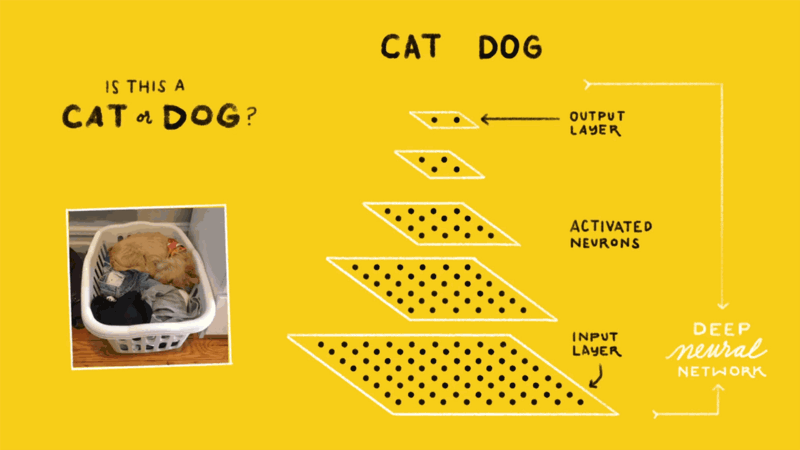

### Response map

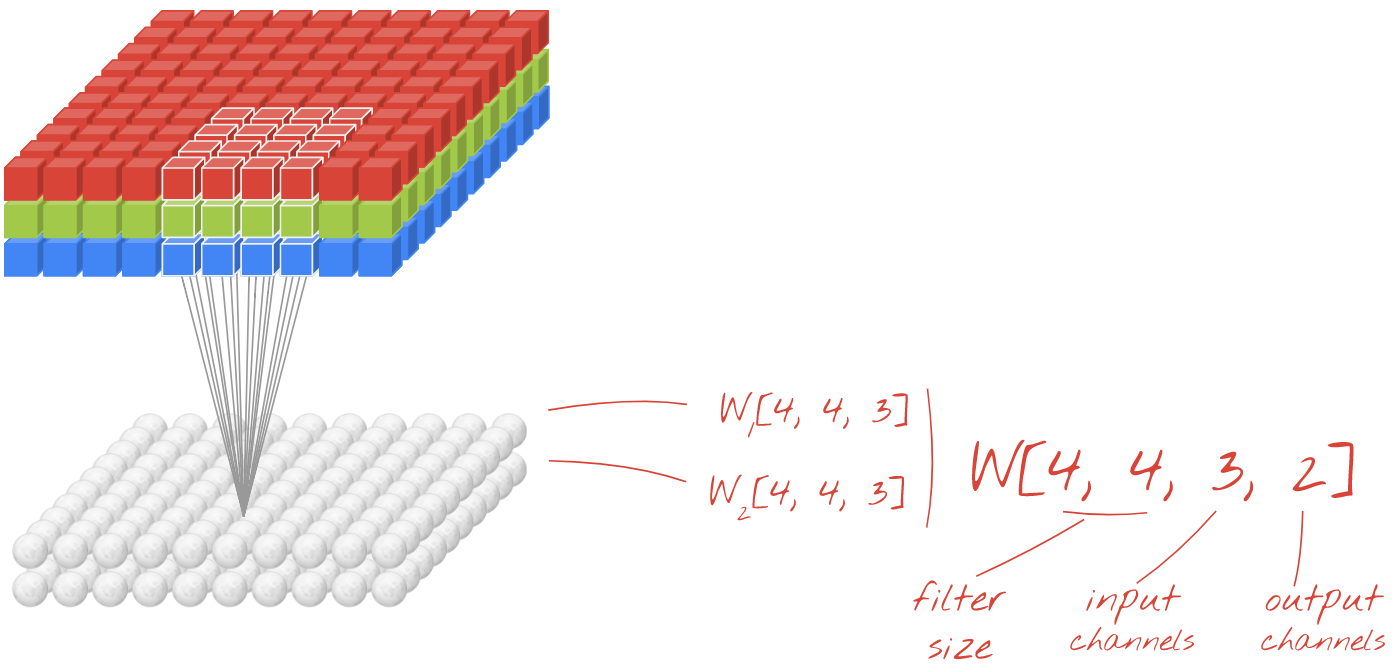

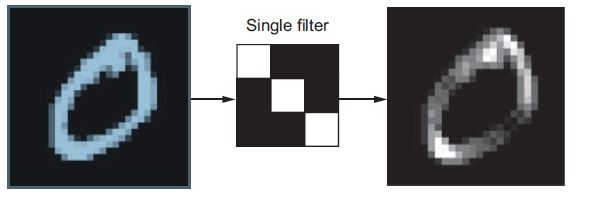




In [46]:
# Model from scratch
from keras import layers
from keras import models

num_categories = 4

model = models.Sequential()
 
#e.g. input_shape=(224, 224, 3) for 224x224 RGB pictures

model.add(layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               95552000  
__________

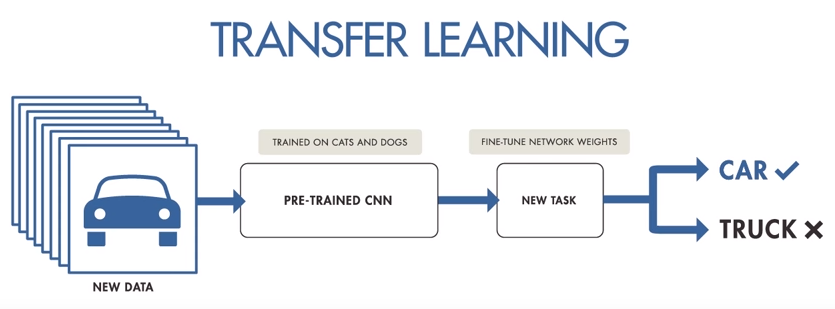
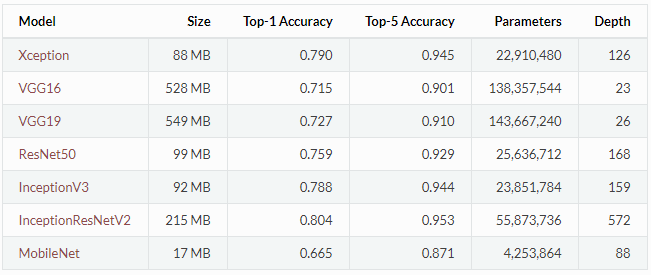

In [ ]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet', include_top=False)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in conv_base.layers[:249]:
    layer.trainable = False
for layer in conv_base.layers[249:]:
    layer.trainable = True
    
# beispiel VGG
if layer.name == 'block5_conv1':
    layer.trainable = True
    
# bestehendes Model einbinden
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

# Zusammenfassung:

#### Convnets: 
* selbst bei kleinen Datensätzen aktuell das Mittel der Wahl bei Computer Vision Aufgaben
* Wiederverwendbarkeit bisheriger Modelle
* Overfitting bei Bildklassifizierung bekämpfen:
    * Image augmentation
* <font color=red >Gefahr: vanishing gradient </font>...gerade die Strukturen in den frühen Layern wichtig (Kanten/Ecken) => Lösung ReLu Aktivierungsfunktion
* Dense layer: Globale Muster (alle Pixel)
* Convolution layer: Lokale Muster (2d Fenster)
    * Translations invariant (wird an einer Stelle gelernt, kann überall wieder erkannt werden)
    * erlernt räumliche Hierarchien
    

# Demo: Prediction (siehe cc_prediction Notebook)

# Anwendungsgebiete <br>
Fog: (Model trainieren in Cloud/ anwenden im Gerät)
* Verarbeitung von rohen Sensordaten
* Anomalieerkennung
* Energieeinsparung